In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model, Sequential
from sklearn.model_selection import train_test_split

In [8]:
import os                                             # Operational System para manipulação de arquivos.
import cv2                                            # OpenCV para manipulação de imagens.
import random
from sklearn.metrics import confusion_matrix, classification_report    # Scikit-Learn para plotar a matriz de confusão e classification_report
import tensorflow as tf
from tensorflow.keras import layers                   # Módulo de camadas do Keras
from tensorflow.keras import callbacks                # Módulo de callbacks do Keras
from tensorflow.keras import optimizers               # Módulo de otimizadores do Keras
from tensorflow.keras.models import load_model        # Função para carregar um modelo salvo
from tensorflow.keras.models import Sequential        # Classe de modelos sequenciais para construir as redes neurais.
from tensorflow.keras.applications import VGG16       # Rede pre treinada (VGG16)
import seaborn as sns
import time
#from google_drive_downloader import GoogleDriveDownloader as gdd

# ImageDataGenerator, utilizado para carregar imagens em tempo de execução
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
df = pd.read_csv('GroundTruth.csv', header=0 ) #importando o arquivo e especificando o cabeçalho

In [10]:
df.head(10)  #lendo

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024306,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0024307,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0024308,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0024309,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0024310,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,ISIC_0024311,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,ISIC_0024312,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,ISIC_0024313,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,ISIC_0024314,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,ISIC_0024315,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Iniciando a manipulação da base de dados como imagens

In [11]:
df=pd.read_csv('GroundTruth.csv')
print (df.head())
print (len(df))
print (df.columns)
labels=['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']

          image  MEL   NV  BCC  AKIEC  BKL   DF  VASC
0  ISIC_0024306  0.0  1.0  0.0    0.0  0.0  0.0   0.0
1  ISIC_0024307  0.0  1.0  0.0    0.0  0.0  0.0   0.0
2  ISIC_0024308  0.0  1.0  0.0    0.0  0.0  0.0   0.0
3  ISIC_0024309  0.0  1.0  0.0    0.0  0.0  0.0   0.0
4  ISIC_0024310  1.0  0.0  0.0    0.0  0.0  0.0   0.0
10015
Index(['image', 'MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC'], dtype='object')


In [12]:
df['image']=df['image'].apply(lambda x: x+ '.jpg')

#### Celulas para entendimento para implementação do algoritmo

In [13]:
df.head(15)

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024306.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0024307.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0024308.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0024309.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0024310.jpg,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,ISIC_0024311.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,ISIC_0024312.jpg,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,ISIC_0024313.jpg,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,ISIC_0024314.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,ISIC_0024315.jpg,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Algoritmo aplicado

In [14]:
labels=['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']
label_list=[]
for i in range (len(df)):
    row= list(df.iloc[i])
    del row[0]
    index=np.argmax(row)
    label=labels[index]
    label_list.append(label)
df['label']= label_list
df=df.drop(labels, axis=1)
print (df.head())

              image label
0  ISIC_0024306.jpg    NV
1  ISIC_0024307.jpg    NV
2  ISIC_0024308.jpg    NV
3  ISIC_0024309.jpg    NV
4  ISIC_0024310.jpg   MEL


### **Separando os dados para validação e teste por cada classe**

In [15]:
train_split=.95
valid_split=.025

dummy_split=valid_split/(1-train_split)
train_df, dummy_df= train_test_split(df, train_size=train_split, shuffle=True, random_state=123)
valid_df, test_df= train_test_split(dummy_df, train_size=dummy_split, shuffle=True, random_state=123)

print(' train_df length: ', len(train_df), '  test_df length: ', len(test_df), '  valid_df length: ', len(valid_df))  
print (train_df.head())
print (train_df['label'].value_counts())

 train_df length:  9514   test_df length:  251   valid_df length:  250
                 image label
3231  ISIC_0027537.jpg    NV
7927  ISIC_0032233.jpg    NV
6141  ISIC_0030447.jpg    NV
5967  ISIC_0030273.jpg    NV
7336  ISIC_0031642.jpg   MEL
NV       6384
MEL      1053
BKL      1035
BCC       488
AKIEC     309
VASC      138
DF        107
Name: label, dtype: int64


In [16]:
#X = np.array([train_df[0]])
train_df.shape

(9514, 2)

### Balanceando o numero de imagens por cada classe

In [17]:
size=300#numero de imagens por classe
samples=[]
group=df.groupby('label')
for label in df['label'].unique():
    Lgroup=group.get_group(label)
    count=int(Lgroup['label'].value_counts())    
    if count>=size:
        sample=Lgroup.sample(size, axis=0)        
    else:        
        sample=Lgroup.sample(frac=1, axis=0)
    samples.append(sample) 
train_df=pd.concat(samples, axis=0).reset_index(drop=True)
print (len(train_df))
print ('final number of classes: ', len(train_df['label'].unique()))       
print (train_df['label'].value_counts())  

1757
final number of classes:  7
NV       300
MEL      300
BKL      300
AKIEC    300
BCC      300
VASC     142
DF       115
Name: label, dtype: int64


In [18]:
print ('final number of classes: ', len(test_df['label'].unique()))       
print (test_df['label'].value_counts())  
print ('final number of classes: ', len(valid_df['label'].unique()))       
print (valid_df['label'].value_counts())  

final number of classes:  7
NV       163
MEL       35
BKL       30
BCC       10
AKIEC      7
VASC       3
DF         3
Name: label, dtype: int64
final number of classes:  7
NV       158
BKL       34
MEL       25
BCC       16
AKIEC     11
DF         5
VASC       1
Name: label, dtype: int64


**Celulas sem funcionalidade no momento**

In [19]:
sdir=r'images/'
height=224  
width=224 
channels=3  
batch_size= 40  
img_shape=(height, width, channels)
img_size=(height, width)

# code below determines test generator batch size and steps so that test_batch_size X test_steps = number of test samples
# ensures that for predictions you go through the test set exactly once
length=len(test_df)
test_batch_size=sorted([int(length/n) for n in range(1,length+1) if length % n ==0 and length/n<=80],reverse=True)[0]  
test_steps=int(length/test_batch_size)
print ( 'test batch size: ' ,test_batch_size, '  test steps: ', test_steps)
#
def scalar(img): # unused for efficientnet model
    return img/127.5-1  # scale pixel between -1 and +1
gen=ImageDataGenerator(        # normalizando as imagens
                  rotation_range = 10,       # Rotação aleatória de até 20°
                  width_shift_range = 0.1,   # Translação horizontal de até 20% da largura
                  height_shift_range = 0.1,  # Translação vertical de até 20% da altura
                  zoom_range = 0.1,          # Zoom aleatório de até 20%
                  shear_range = 0.02,         # Deformação de 10%
                  horizontal_flip = True,    # Espelhamento horizontal aleatório
                  vertical_flip = True,     # Espelhamento vertical aleatório
                  fill_mode = "nearest")     # Preenchimento de buracos pelo pixel mais próximo
gen2 = ImageDataGenerator()
train_gen=gen.flow_from_dataframe( train_df, sdir, x_col='image', y_col='label',target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=True, batch_size=batch_size)
test_gen=gen2.flow_from_dataframe( test_df, sdir, x_col='image', y_col='label', target_size=img_size,class_mode='categorical',
                                    color_mode='rgb', shuffle=False, batch_size=test_batch_size)
valid_gen=gen2.flow_from_dataframe( valid_df, sdir, x_col='image', y_col='label',target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=True, batch_size=batch_size)

classes=list(train_gen.class_indices.keys())

class_count=len(classes)
train_steps=int(len(train_gen.labels)/batch_size)

test batch size:  1   test steps:  251
Found 1757 validated image filenames belonging to 7 classes.
Found 251 validated image filenames belonging to 7 classes.
Found 250 validated image filenames belonging to 7 classes.


In [20]:
classes  = list(train_gen.class_indices.keys())
class_count  = len(classes)
count_array=np.zeros((class_count))
len(count_array)

7

In [21]:
class_weight={}
train_dict=train_gen.class_indices
classes=list(train_dict.keys())
class_count=len(classes)
labels=train_gen.labels
count_array=np.zeros((class_count))
for value in train_dict.values(): # these are the integer values of the labels
    for label in labels: # iterate through the train_gen labels   
        if label==value:
            count_array[value] +=1    
#print (count_array)
max_samples=np.max(count_array)
max_index=np.argmax(count_array)
max_class=classes[max_index]
print('class ', max_class,' with ', max_samples, 'samples has the largest sample size')
msg='{0:^30s}{1:^10s}{2:^9s}'.format('Class', 'Samples', 'Weight')
print(msg)
for i in range (class_count):
    class_weight[i]= max_samples/count_array[i]
    msg=f'{classes[i]:^30s}{str(count_array[i]):^10s}{class_weight[i]:^9.5f}'
    print (msg)

class  AKIEC  with  300.0 samples has the largest sample size
            Class              Samples   Weight  
            AKIEC               300.0    1.00000 
             BCC                300.0    1.00000 
             BKL                300.0    1.00000 
              DF                115.0    2.60870 
             MEL                300.0    1.00000 
              NV                300.0    1.00000 
             VASC               142.0    2.11268 


In [22]:
model_name='Xception'
base_model=tf.keras.applications.Xception(include_top=False,weights="imagenet",input_tensor=None,
                                          input_shape=img_shape,pooling="max", classes=1000,classifier_activation="softmax",)
x=base_model.output
x=keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
x = Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
                bias_regularizer=regularizers.l1(0.006) ,activation='relu')(x)
x=Dropout(rate=.25, seed=123)(x)        
output=Dense(class_count, activation='softmax')(x)
model=Model(inputs=base_model.input, outputs=output)
model.compile(Adamax(learning_rate= 0.001), loss='categorical_crossentropy', metrics=['accuracy']) 

In [5]:
model.summary()

NameError: name 'model' is not defined

In [231]:
Xcepction = model.get_layer("input_13")
for layer in model.layers:
    status = "Treinável" if layer.trainable else "Congelada"
    print("Camada '{}' - Status: {} - Entrada: {} - Saída: {}".format(layer.name,
                                                                      status, 
                                                                      layer.input_shape, 
                                                                      layer.output_shape))

Camada 'input_13' - Status: Congelada - Entrada: [(None, 224, 224, 3)] - Saída: [(None, 224, 224, 3)]
Camada 'block1_conv1' - Status: Congelada - Entrada: (None, 224, 224, 3) - Saída: (None, 111, 111, 32)
Camada 'block1_conv1_bn' - Status: Congelada - Entrada: (None, 111, 111, 32) - Saída: (None, 111, 111, 32)
Camada 'block1_conv1_act' - Status: Congelada - Entrada: (None, 111, 111, 32) - Saída: (None, 111, 111, 32)
Camada 'block1_conv2' - Status: Congelada - Entrada: (None, 111, 111, 32) - Saída: (None, 109, 109, 64)
Camada 'block1_conv2_bn' - Status: Congelada - Entrada: (None, 109, 109, 64) - Saída: (None, 109, 109, 64)
Camada 'block1_conv2_act' - Status: Congelada - Entrada: (None, 109, 109, 64) - Saída: (None, 109, 109, 64)
Camada 'block2_sepconv1' - Status: Congelada - Entrada: (None, 109, 109, 64) - Saída: (None, 109, 109, 128)
Camada 'block2_sepconv1_bn' - Status: Congelada - Entrada: (None, 109, 109, 128) - Saída: (None, 109, 109, 128)
Camada 'block2_sepconv2_act' - Status: Co

In [232]:
set_trainable = False
for layer in model.layers:
    if layer.name == "add_145":
        set_trainable = True
    layer.trainable = set_trainable

In [233]:
Xcepction = model.get_layer("input_13")
for layer in model.layers:
    status = "Treinável" if layer.trainable else "Congelada"
    print("Camada '{}' - Status: {} - Entrada: {} - Saída: {}".format(layer.name,
                                                                      status, 
                                                                      layer.input_shape, 
                                                                      layer.output_shape))

Camada 'input_13' - Status: Congelada - Entrada: [(None, 224, 224, 3)] - Saída: [(None, 224, 224, 3)]
Camada 'block1_conv1' - Status: Congelada - Entrada: (None, 224, 224, 3) - Saída: (None, 111, 111, 32)
Camada 'block1_conv1_bn' - Status: Congelada - Entrada: (None, 111, 111, 32) - Saída: (None, 111, 111, 32)
Camada 'block1_conv1_act' - Status: Congelada - Entrada: (None, 111, 111, 32) - Saída: (None, 111, 111, 32)
Camada 'block1_conv2' - Status: Congelada - Entrada: (None, 111, 111, 32) - Saída: (None, 109, 109, 64)
Camada 'block1_conv2_bn' - Status: Congelada - Entrada: (None, 109, 109, 64) - Saída: (None, 109, 109, 64)
Camada 'block1_conv2_act' - Status: Congelada - Entrada: (None, 109, 109, 64) - Saída: (None, 109, 109, 64)
Camada 'block2_sepconv1' - Status: Congelada - Entrada: (None, 109, 109, 64) - Saída: (None, 109, 109, 128)
Camada 'block2_sepconv1_bn' - Status: Congelada - Entrada: (None, 109, 109, 128) - Saída: (None, 109, 109, 128)
Camada 'block2_sepconv2_act' - Status: Co

In [234]:
model.summary()

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_13[0][0]']               
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

In [235]:
tf.keras.utils.plot_model(model, show_shapes = True, show_layer_names = False)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [23]:
def print_in_color(txt_msg,fore_tupple,back_tupple,):
    #prints the text_msg in the foreground color specified by fore_tupple with the background specified by back_tupple 
    #text_msg is the text, fore_tupple is foregroud color tupple (r,g,b), back_tupple is background tupple (r,g,b)
    rf,gf,bf=fore_tupple
    rb,gb,bb=back_tupple
    msg='{0}' + txt_msg
    mat='\33[38;2;' + str(rf) +';' + str(gf) + ';' + str(bf) + ';48;2;' + str(rb) + ';' +str(gb) + ';' + str(bb) +'m' 
    print(msg .format(mat), flush=True)
    print('\33[0m', flush=True) # returns default print color to back to black
    return

In [24]:
class LRA(keras.callbacks.Callback):
    reset=False
    count=0
    stop_count=0
    tepochs=0
    def __init__(self,model, patience,stop_patience, threshold, factor, dwell, model_name, freeze,batches, initial_epoch):
        super(LRA, self).__init__()
        self.model=model
        self.patience=patience # specifies how many epochs without improvement before learning rate is adjusted
        self.stop_patience=stop_patience
        self.threshold=threshold # specifies training accuracy threshold when lr will be adjusted based on validation loss
        self.factor=factor # factor by which to reduce the learning rate
        self.dwell=dwell
        self.lr=float(tf.keras.backend.get_value(model.optimizer.lr)) # get the initiallearning rate and save it in self.lr
        self.highest_tracc=0.0 # set highest training accuracy to 0
        self.lowest_vloss=np.inf # set lowest validation loss to infinity
        #self.count=0 # initialize counter that counts epochs with no improvement
        #self.stop_count=0 # initialize counter that counts how manytimes lr has been adjustd with no improvement  
        self.initial_epoch=initial_epoch 
        self.batches=batches
        #self.epochs=epochs
        best_weights=self.model.get_weights() # set a class vaiable so weights can be loaded after training is completed        
        msg=' '
        if freeze==True:
            msgs=f' Starting training using  base model { model_name} with weights frozen to imagenet weights initializing LRA callback'
        else:
            msgs=f' Starting training using base model { model_name} training all layers '            
        #print_in_color (msgs, (244, 252, 3), (55,65,80))
        print(msgs)
    def on_train_begin(self, logs=None):
        msg='{0:^8s}{1:^10s}{2:^9s}{3:^9s}{4:^9s}{5:^9s}{6:^9s}{7:^10s}{8:^8s}{9:^8s}'.format('Epoch', 'Loss', 'Accuracy',
                                                                                           'V_loss','V_acc', 'LR', 'Next LR', 'Monitor', 'Duration', 'Batch')
        #print_in_color(msg, (244,252,3), (55,65,80)) 
        print(msg)
        
    def on_train_batch_begin(self, batch, logs=None):
        msg='{0:83s}{1:4s}of {2:5s}'.format(' ', str(batch), str(self.batches))
        print(msg, '\r', end='') # prints over on the same line to show running batch count
        
        
    def on_epoch_begin(self,epoch, logs=None):
        self.now= time.time()
        
    def on_epoch_end(self, epoch, logs=None):  # method runs on the end of each epoch
        later=time.time()
        duration=later-self.now 
        lr=float(tf.keras.backend.get_value(self.model.optimizer.lr)) # get the current learning rate
        current_lr=lr
        v_loss=logs.get('val_loss')  # get the validation loss for this epoch
        acc=logs.get('accuracy')  # get training accuracy 
        v_acc=logs.get('val_accuracy')
        loss=logs.get('loss')
        #print ( '\n',v_loss, self.lowest_vloss, acc, self.highest_tracc)
        if acc < self.threshold: # if training accuracy is below threshold adjust lr based on training accuracy
            monitor='accuracy'
            if acc>self.highest_tracc: # training accuracy improved in the epoch                
                self.highest_tracc=acc # set new highest training accuracy
                LRA.best_weights=self.model.get_weights() # traing accuracy improved so save the weights
                self.count=0 # set count to 0 since training accuracy improved
                self.stop_count=0 # set stop counter to 0
                if v_loss<self.lowest_vloss:
                    self.lowest_vloss=v_loss
                color= (0,255,0)
                self.lr=lr
            else: 
                # training accuracy did not improve check if this has happened for patience number of epochs
                # if so adjust learning rate
                if self.count>=self.patience -1:
                    color=(245, 170, 66)
                    self.lr= lr* self.factor # adjust the learning by factor
                    tf.keras.backend.set_value(self.model.optimizer.lr, self.lr) # set the learning rate in the optimizer
                    self.count=0 # reset the count to 0
                    self.stop_count=self.stop_count + 1
                    if self.dwell:
                        self.model.set_weights(LRA.best_weights) # return to better point in N space                        
                    else:
                        if v_loss<self.lowest_vloss:
                            self.lowest_vloss=v_loss                                    
                else:
                    self.count=self.count +1 # increment patience counter                    
        else: # training accuracy is above threshold so adjust learning rate based on validation loss
            monitor='val_loss'
            if v_loss< self.lowest_vloss: # check if the validation loss improved 
                self.lowest_vloss=v_loss # replace lowest validation loss with new validation loss                
                LRA.best_weights=self.model.get_weights() # validation loss improved so save the weights
                self.count=0 # reset count since validation loss improved  
                self.stop_count=0  
                color=(0,255,0)
                self.lr=lr
            else: # validation loss did not improve
                if self.count>=self.patience-1:
                    color=(245, 170, 66)
                    self.lr=self.lr * self.factor # adjust the learning rate                    
                    self.stop_count=self.stop_count + 1 # increment stop counter because lr was adjusted 
                    self.count=0 # reset counter
                    tf.keras.backend.set_value(self.model.optimizer.lr, self.lr) # set the learning rate in the optimizer
                    if self.dwell:
                        self.model.set_weights(LRA.best_weights) # return to better point in N space
                else: 
                    self.count =self.count +1 # increment the patience counter                    
                if acc>self.highest_tracc:
                    self.highest_tracc= acc
        msg=f'{str(epoch+1):^3s}/{str(LRA.tepochs):4s} {loss:^9.3f}{acc*100:^9.3f}{v_loss:^9.5f}{v_acc*100:^9.3f}{current_lr:^9.5f}{self.lr:^9.5f}{monitor:^11s}{duration:^8.2f}'
        #print_in_color (msg,color, (55,65,80))
        print(msg)
        if self.stop_count> self.stop_patience - 1: # check if learning rate has been adjusted stop_count times with no improvement
            msg=f' training has been halted at epoch {epoch + 1} after {self.stop_patience} adjustments of learning rate with no improvement'
            #print_in_color(msg, (0,255,0), (55,65,80))
            print(msg)
            self.model.stop_training = True # stop training

In [25]:
epochs =40
patience= 1 # number of epochs to wait to adjust lr if monitored value does not improve
stop_patience =3 # número de épocas para esperar antes de parar o treinamento se o valor monitorado não melhorar
threshold=.85 # se a precisão do trem for < threshold, ajuste a precisão do monitor, caso contrário, monitore o validation loss
factor=.5 # fator de redução do learning rate
dwell=True # experimental, se True e a métrica monitorada não melhorar na época atual e é definido os pesos do modelo de volta aos pesos da época anterior
freeze=False # se verdadeiros serão usados os pesos do model base
batches=train_steps
callbacks=[LRA(model=model,patience=patience,stop_patience=stop_patience, threshold=threshold,
                   factor=factor,dwell=dwell, model_name=model_name, freeze=freeze, batches=batches,initial_epoch=0 )]
LRA.tepochs=epochs  # determinando o valor da ultima época
history=model.fit(x=train_gen,  epochs=epochs, verbose=0, callbacks=callbacks,  validation_data=valid_gen,
               validation_steps=None,  shuffle=False,  initial_epoch=0, class_weight=class_weight)
history_dict = history.history

 Starting training using base model Xception training all layers 
 Epoch     Loss   Accuracy  V_loss    V_acc     LR     Next LR  Monitor  Duration Batch  
 1 /40     9.270   32.214   8.17477  62.400   0.00100  0.00100  accuracy   45.78   43  of 43    
 2 /40     7.750   49.630   7.05117  62.400   0.00100  0.00100  accuracy   36.37   43  of 43    
 3 /40     6.659   62.379   6.32085  59.600   0.00100  0.00100  accuracy   37.36   43  of 43    
 4 /40     5.784   68.981   5.61853  61.200   0.00100  0.00100  accuracy   36.82   43  of 43    
 5 /40     5.005   76.266   4.85118  71.600   0.00100  0.00100  accuracy   36.38   43  of 43    
 6 /40     4.375   78.771   4.27301  72.400   0.00100  0.00100  accuracy   37.18   43  of 43    
 7 /40     3.832   82.812   3.75354  77.200   0.00100  0.00100  accuracy   36.72   43  of 43    
 8 /40     3.362   86.283   3.46034  75.200   0.00100  0.00100  val_loss   36.38   43  of 43    
 9 /40     2.915   88.958   3.04601  78.400   0.00100  0.00100  val_

In [26]:
def print_info( test_gen, preds, print_code, save_dir, subject ):
    
    class_dict=test_gen.class_indices
    labels= test_gen.labels
    file_names= test_gen.filenames 
    error_list=[]
    true_class=[]
    pred_class=[]
    prob_list=[]
    new_dict={}
    error_indices=[]
    y_pred=[]
    for key,value in class_dict.items():
        new_dict[value]=key             # dictionary {integer of class number: string of class name}
    # store new_dict as a text fine in the save_dir
    classes=list(new_dict.values())     # list of string of class names
    dict_as_text=str(new_dict)
    dict_name= subject + '-' +str(len(classes)) +'.txt'  
    dict_path=os.path.join(save_dir,dict_name)    
    with open(dict_path, 'w') as x_file:
        x_file.write(dict_as_text)    
    errors=0      
    for i, p in enumerate(preds):
        pred_index=np.argmax(p)        
        true_index=labels[i]  # labels are integer values
        if pred_index != true_index: # a misclassification has occurred
            error_list.append(file_names[i])
            true_class.append(new_dict[true_index])
            pred_class.append(new_dict[pred_index])
            prob_list.append(p[pred_index])
            error_indices.append(true_index)            
            errors=errors + 1
        y_pred.append(pred_index)    
    if print_code !=0:
        if errors>0:
            if print_code>errors:
                r=errors
            else:
                r=print_code           
            msg='{0:^28s}{1:^28s}{2:^28s}{3:^16s}'.format('Filename', 'Predicted Class' , 'True Class', 'Probability')
            print_in_color(msg, (0,255,0),(55,65,80))
            for i in range(r):                
                split1=os.path.split(error_list[i])                
                split2=os.path.split(split1[0])                
                fname=split2[1] + '/' + split1[1]
                msg='{0:^28s}{1:^28s}{2:^28s}{3:4s}{4:^6.4f}'.format(fname, pred_class[i],true_class[i], ' ', prob_list[i])
                print_in_color(msg, (255,255,255), (55,65,60))
                #print(error_list[i]  , pred_class[i], true_class[i], prob_list[i])               
        else:
            msg='With accuracy of 100 % there are no errors to print'
            print_in_color(msg, (0,255,0),(55,65,80))
    if errors>0:
        plot_bar=[]
        plot_class=[]
        for  key, value in new_dict.items():        
            count=error_indices.count(key) 
            if count!=0:
                plot_bar.append(count) # list containg how many times a class c had an error
                plot_class.append(value)   # stores the class 
        fig=plt.figure()
        fig.set_figheight(len(plot_class)/3)
        fig.set_figwidth(10)
        plt.style.use('fivethirtyeight')
        for i in range(0, len(plot_class)):
            c=plot_class[i]
            x=plot_bar[i]
            plt.barh(c, x, )
            plt.title( ' Erros por classe no Test Set')
    y_true= np.array(labels)        
    y_pred=np.array(y_pred)
    if len(classes)<= 30:
        # create a confusion matrix
        cm = confusion_matrix(y_true, y_pred)
        # Normalise
        cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        fig, ax = plt.subplots(figsize=(10,10))
        sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=classes, yticklabels=classes)
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.show(block=False)
        
        #cm = confusion_matrix(y_true, y_pred)        
        #length=len(classes)
        #if length<8:
        #    fig_width=8
        #    fig_height=8
        #else:
        #    fig_width= int(length * .5)
        #    fig_height= int(length * .5)
        #plt.figure(figsize=(fig_width, fig_height))
        #sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        #plt.xticks(np.arange(length)+.5, classes, rotation= 90)
        #plt.yticks(np.arange(length)+.5, classes, rotation=0)
        #plt.xlabel("Predicted")
        #plt.ylabel("Actual")
        #plt.title("Confusion Matrix")
        #plt.show()
    clr = classification_report(y_true, y_pred, target_names=classes)
    print("Classification Report:\n----------------------\n", clr)

251/251 [==============================] - 5s 15ms/step


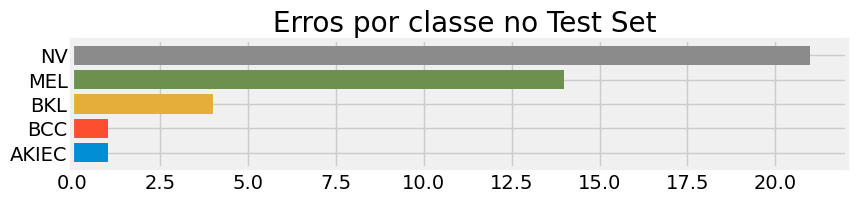

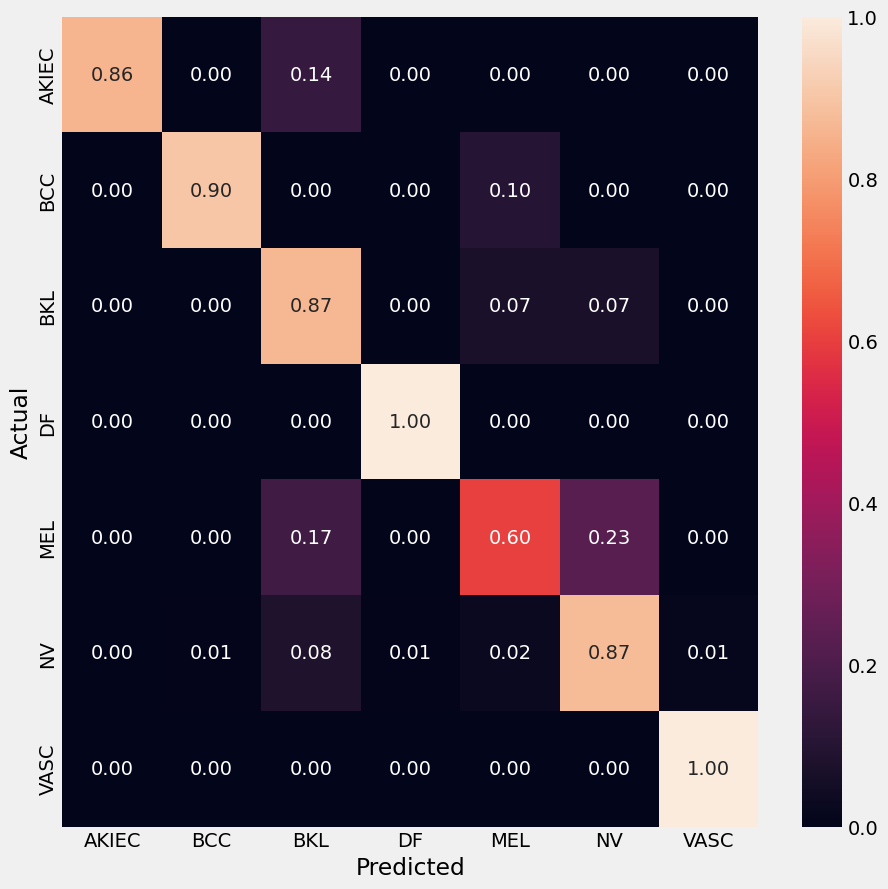

Classification Report:
----------------------
               precision    recall  f1-score   support

       AKIEC       1.00      0.86      0.92         7
         BCC       0.90      0.90      0.90        10
         BKL       0.57      0.87      0.68        30
          DF       0.75      1.00      0.86         3
         MEL       0.75      0.60      0.67        35
          NV       0.93      0.87      0.90       163
        VASC       0.60      1.00      0.75         3

    accuracy                           0.84       251
   macro avg       0.79      0.87      0.81       251
weighted avg       0.86      0.84      0.84       251



In [27]:
save_dir=r'./' # output directory where model will be saved
subject='cancer' # part of the name of the saved model
model.save("XceptionV1_skincancer.h5")
print_code=0
preds=model.predict(test_gen) 
print_info( test_gen, preds, print_code, save_dir, subject ) 

In [28]:
# Atributo do generator que fornece o número de amostras detectadas
test_samples = test_gen.samples

test_loss, accuracy = model.evaluate( test_gen )

print("Test Accuracy:", 100*accuracy, "%")
print("Acertos: {} - Erros: {}".format(round(test_samples * accuracy), 
                                       round(test_samples * (1-accuracy) )))

251/251 [==============================] - 5s 19ms/step - loss: 2.1068 - accuracy: 0.8327
Test Accuracy: 83.26693177223206 %
Acertos: 209 - Erros: 42


### Exibindo o gráfico de perda e acurácia:

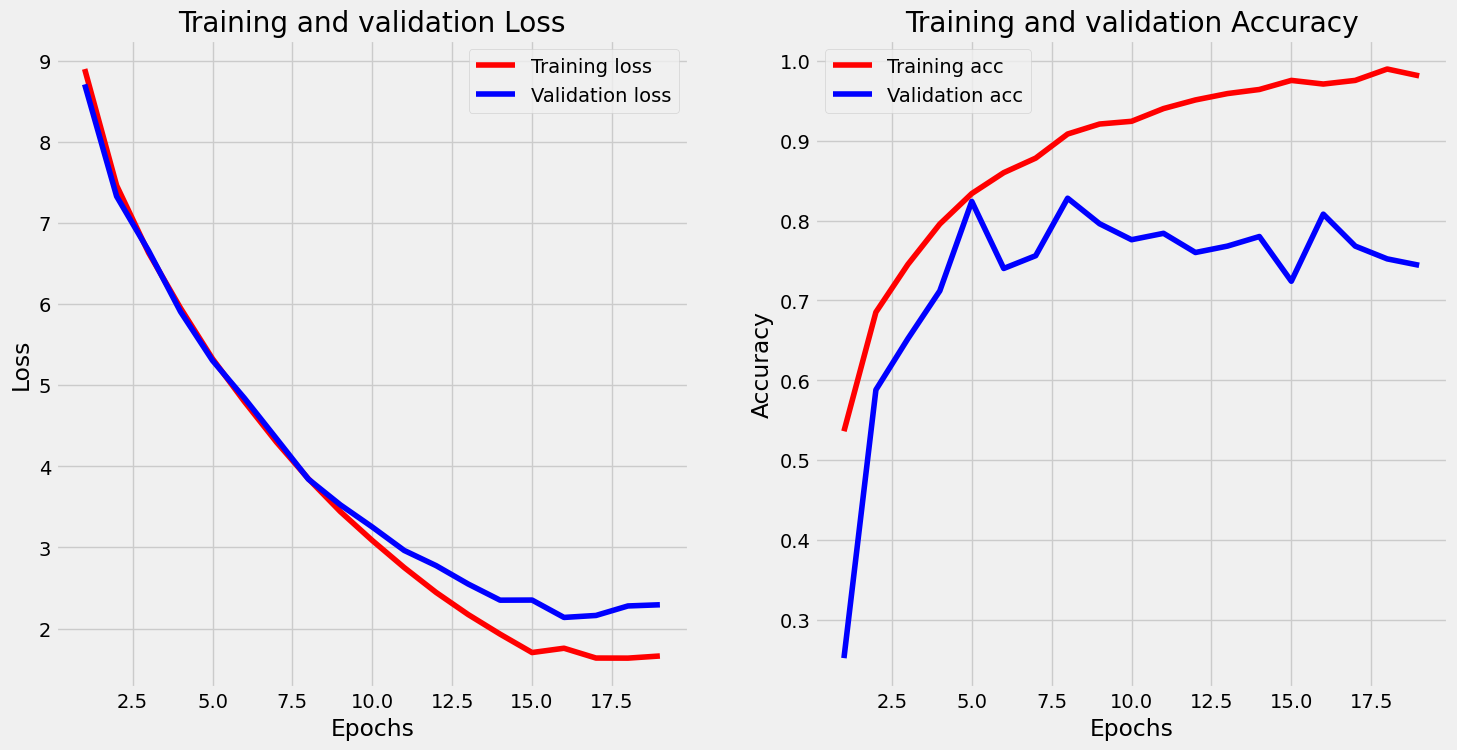

In [29]:
fig, axes = plt.subplots(1, 2, squeeze = False, figsize = (16,8))

# Loss
train_loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

# Epochs
epochs = range(1, len(train_loss_values) + 1)

# Accuracy
train_acc_values = history_dict["accuracy"]
val_acc_values = history_dict["val_accuracy"]

ax = axes.flat[0]
ax.plot(epochs, train_loss_values, "r", label="Training loss")
ax.plot(epochs, val_loss_values, "b", label="Validation loss")
ax.set_title("Training and validation Loss")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.legend()

ax = axes.flat[1]
ax.plot(epochs, train_acc_values, "r", label="Training acc")
ax.plot(epochs, val_acc_values, "b", label="Validation acc")
ax.set_title("Training and validation Accuracy")
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy")
ax.legend()

### Gerando CSV manipulado

In [31]:
valid_df.to_csv("validation.csv")
test_df.to_csv("test.csv")
train_df.to_csv("train.csv")

In [32]:
def show_image_samples(gen ):
    test_dict=test_gen.class_indices
    classes=list(test_dict.keys())    
    images,labels=next(gen) # get a sample batch from the generator 
    plt.figure(figsize=(20, 20))
    length=len(labels)
    if length<25:   #show maximum of 25 images
        r=length
    else:
        r=25
    for i in range(r):
        plt.subplot(5, 5, i + 1)
        image=images[i]/255 # scale images between 0 and 1 becaue no preprocessing scaling was done for efficientnet
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color='blue', fontsize=16)
        plt.axis('off')
    plt.show()

In [33]:
im = show_image_samples(train_gen)

<Figure size 1440x1440 with 0 Axes>

**Continuando com a manipulação de dados**

### Gerando dados para treino

In [27]:
import shutil
import sys
import os
labels = pd.read_csv(r'train.csv')

train_directory = r'images'
DR = r'DR_train3'
cont = 0
if not os.path.exists(DR):
    os.mkdir(DR)
    
for _, filename, class_name  in labels.values:
    
    if not os.path.exists(DR + '/' + str(class_name)):
        os.mkdir(DR + '/' + str(class_name))
    src_path = train_directory + '/' + filename 
    dst_path = DR + '/' + str(class_name) + '/' + filename
    try:
        cont +=1
        shutil.copy(src_path, dst_path)
        if(cont == labels.shape[0]):
            print('Sucesso')
    except IOError as e:
        print('Unable to copy {} to {}' .format(src_path, dst_path))
    except:
        print('Whe try to copy {} to {}, unexpected error: {}'.format(src_path, dst_path, sys.exc_info()))

Sucesso


### Gerando dados para teste

In [26]:
import shutil
import sys
import os
labels = pd.read_csv(r'test.csv')

train_directory = r'images'
DR = r'DR_test3'
cont = 0
if not os.path.exists(DR):
    os.mkdir(DR)
    
for _, filename, class_name  in labels.values:
    
    if not os.path.exists(DR + '/' + str(class_name)):
        os.mkdir(DR + '/' + str(class_name))
    src_path = train_directory + '/' + filename 
    dst_path = DR + '/'  + str(class_name) + '/' + filename 
    try:
        cont +=1
        shutil.copy(src_path, dst_path)
        if(cont == labels.shape[0]):
            print('Sucesso')
    except IOError as e:
        print('Unable to copy {} to {}' .format(src_path, dst_path))
    except:
        print('Whe try to copy {} to {}, unexpected error: {}'.format(src_path, dst_path, sys.exc_info()))
    

Sucesso


### Gerando dados para validação

In [28]:
import shutil
import sys
import os
labels = pd.read_csv(r'validation.csv')

train_directory = r'images'
DR = r'DR_validation3'
cont = 0
if not os.path.exists(DR):
    os.mkdir(DR)
    
for _, filename, class_name  in labels.values:
    
    if not os.path.exists(DR + '/' + str(class_name)):
        os.mkdir(DR + '/' + str(class_name))
    src_path = train_directory + '/' + filename 
    dst_path = DR + '/' + str(class_name) + '/' + filename 
    try:
        cont +=1
        shutil.copy(src_path, dst_path)
        if(cont == labels.shape[0]):
            print('Sucesso')
    except IOError as e:
        print('Unable to copy {} to {}' .format(src_path, dst_path))
    except:
        print('Whe try to copy {} to {}, unexpected error: {}'.format(src_path, dst_path, sys.exc_info()))

Sucesso


In [11]:
X = train_df["image"]
y = train_df["label"]
y.value_counts()

NV       2100
MEL      1113
BKL      1099
BCC       514
AKIEC     327
VASC      142
DF        115
Name: label, dtype: int64

In [12]:
import glob
import cv2 
def resize_img(dim,directory,formato, future_directory):
    '''Dimensão, Diretório de origem, formato da imagem, diretório futuro'''
    i = 1
    for filename in glob.glob(directory + '/*'+ formato):
        img = cv2.imread(filename)
        image = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
        cv2.imwrite('{}{}{}'.format(future_directory +'/',i,'.jpg'),image)
        i+=1

In [13]:
labels = ['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']
i = 0
for class_name in labels:
    if not os.path.exists('DR_train/' + str(i) + 'modified'):
        os.mkdir('DR_train/' + str(class_name) + 'modified')
        dr = 'DR_train/' + str(class_name)
        dr_future = 'DR_train/' + str(class_name) + 'modified'
        resize_img((250,250), dr, '.jpg', dr_future)
        i+=1
    else:
        i+=1
        continue

NameError: name 'os' is not defined

### OverSampling

In [14]:
from imblearn.over_sampling import RandomOverSampler, SMOTE,ADASYN
oversampling = RandomOverSampler()
oversampled_X, oversampled_y  = oversampling.fit_resample(train_df , y)

new_data = oversampled_X

In [15]:
new_data.head(100)

,image,label
0,ISIC_0030612,NV
1,ISIC_0025868,NV
2,ISIC_0024749,NV
3,ISIC_0026140,NV
4,ISIC_0032122,NV
...,...,...
95,ISIC_0030704,NV
96,ISIC_0031680,NV
97,ISIC_0030193,NV
98,ISIC_0032416,NV


In [17]:
new_data['label'].value_counts()

NV       2100
MEL      2100
BKL      2100
DF       2100
AKIEC    2100
BCC      2100
VASC     2100
Name: label, dtype: int64

In [3]:
from PIL import Image
import numpy as np
import sys
import os
import csv

def createFileList(myDir, format='.jpg'):
    fileList = []
    print(myDir)
    for root, dirs, files in os.walk(myDir, topdown=False):
        for name in files:
            if name.endswith(format):
                fullName = os.path.join(root, name)
                fileList.append(fullName)
    return fileList

In [5]:


# load the original image
myFileList = createFileList('DR_train/Trainmodified')
for file in myFileList:
    print(file)
    img_file = Image.open(file)

    # get original image parameters...
    width, height = img_file.size
    format = img_file.format
    mode = img_file.mode

     # Make image Greyscale
    img_grey = img_file.convert('L')
    value = np.asarray(img_grey.getdata(), dtype=np.int).reshape((img_grey.size[1], img_grey.size[0]))


    value = value.flatten()
    print(value)
    with open("img_pixels.csv", 'a') as f:
        writer = csv.writer(f)
        writer.writerow(value)

DR_train/Trainmodified
DR_train/Trainmodified\AKIECmodified\1.jpg
[145 144 146 ... 141 140 140]
DR_train/Trainmodified\AKIECmodified\10.jpg

C:\Users\iuryc\AppData\Local\Temp\ipykernel_12268\138048661.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  value = np.asarray(img_grey.getdata(), dtype=np.int).reshape((img_grey.size[1], img_grey.size[0]))



[115 117 117 ... 155 155 154]
DR_train/Trainmodified\AKIECmodified\100.jpg
[119 123 123 ... 117 110 106]
DR_train/Trainmodified\AKIECmodified\101.jpg
[109 111 112 ... 154 154 151]
DR_train/Trainmodified\AKIECmodified\102.jpg
[149 149 150 ...  80  73  66]
DR_train/Trainmodified\AKIECmodified\103.jpg
[157 159 160 ... 174 174 171]
DR_train/Trainmodified\AKIECmodified\104.jpg
[121 120 119 ... 163 156 151]
DR_train/Trainmodified\AKIECmodified\105.jpg
[159 161 162 ... 121 120 119]
DR_train/Trainmodified\AKIECmodified\106.jpg
[186 184 183 ... 170 172 172]
DR_train/Trainmodified\AKIECmodified\107.jpg
[153 152 148 ... 154 153 152]
DR_train/Trainmodified\AKIECmodified\108.jpg
[190 187 187 ... 163 165 164]
DR_train/Trainmodified\AKIECmodified\109.jpg
[198 194 195 ... 196 196 195]
DR_train/Trainmodified\AKIECmodified\11.jpg
[138 139 141 ... 181 179 178]
DR_train/Trainmodified\AKIECmodified\110.jpg
[140 147 139 ... 169 169 169]
DR_train/Trainmodified\AKIECmodified\111.jpg
[194 194 191 ... 202 201 